## Unpickle my Pitchfork_df 

In [1]:
import pandas as pd
import re
import pickle
import string

# Display data tools
from IPython.display import display
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [2]:
Pitchfork_tm = pd.read_pickle("./Pitchfork_unpick.pkl")
Pitchfork_tm

,Author,Publication,Artist,Album_Name,Genre,Score,Contents
0,Sheldon Pearce,Pitchfork,BTS,Map of the Soul: 7,Pop/R&B,6.3,the k pop groups latest is part memoir part f...
1,Ruth Saxelby,Pitchfork,Various Artists,Kulør 006,Electronic,7.5,the danish dj courtesys label pivots from cope...
2,Cat Zhang,Pitchfork,Sunny Jain,Wild Wild East,Experimental,6.8,the composer and jazz multi instrumentalist ex...
3,Andy Beta,Pitchfork,AceMoMA,A New Dawn,Electronic,7.6,rising new york fixtures acemo and moma ready ...
4,Paul A. Thompson,Pitchfork,Boldy James,The Price of Tea in China,Rap,8.0,on their latest collaboration the detroit rap...
...,...,...,...,...,...,...,...
1182,Larry Fitzmaurice,Pitchfork,Diplo,Europa EP,Electronic,4.2,despite trending toward pop in recent years t...
1183,Eric Torres,Pitchfork,IAMDDB,Swervvvvv.5,Rap,7.3,on her supposedly final mixtape before she iss...
1184,Stephen Kearse,Pitchfork,Offset,Father of 4,Rap,6.9,though its undermined by its inertia and lack ...
1185,Olivia Horn,Pitchfork,Julia Jacklin,Crushing,Rock,7.7,on an album that mines failed relationships fo...


In [3]:
for content in Pitchfork_tm.Contents:
    print(content)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



### Import Preprocessing Modules

In [4]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import TreebankWordTokenizer
from nltk.stem import PorterStemmer
from nltk.stem.snowball import SnowballStemmer
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
from nltk.tokenize import TreebankWordTokenizer
from nltk.tokenize import RegexpTokenizer
from nltk.util import ngrams
from nltk.corpus import stopwords

In [5]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /home/jcnachman/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [6]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/jcnachman/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

## Preprocessing 
- Remove Characters and Replace Certain words based on topic modeling results in JoannaN_Topic_Modeling1 notebook

In [15]:
# Remove where this is no review
Pitchfork_tm = Pitchfork_tm[Pitchfork_tm.Publication != 'No publication']
Pitchfork_tm

,Author,Publication,Artist,Album_Name,Genre,Score,Contents
0,Sheldon Pearce,Pitchfork,BTS,Map of the Soul: 7,Pop/R&B,6.3,the k pop groups latest is part memoir part f...
1,Ruth Saxelby,Pitchfork,Various Artists,Kulør 006,Electronic,7.5,the danish dj courtesys label pivots from cope...
2,Cat Zhang,Pitchfork,Sunny Jain,Wild Wild East,Experimental,6.8,the composer and jazz multi instrumentalist ex...
3,Andy Beta,Pitchfork,AceMoMA,A New Dawn,Electronic,7.6,rising new york fixtures acemo and moma ready ...
4,Paul A. Thompson,Pitchfork,Boldy James,The Price of Tea in China,Rap,8.0,on their latest collaboration the detroit rap...
...,...,...,...,...,...,...,...
1182,Larry Fitzmaurice,Pitchfork,Diplo,Europa EP,Electronic,4.2,despite trending toward pop in recent years t...
1183,Eric Torres,Pitchfork,IAMDDB,Swervvvvv.5,Rap,7.3,on her supposedly final mixtape before she iss...
1184,Stephen Kearse,Pitchfork,Offset,Father of 4,Rap,6.9,though its undermined by its inertia and lack ...
1185,Olivia Horn,Pitchfork,Julia Jacklin,Crushing,Rock,7.7,on an album that mines failed relationships fo...


In [16]:
# Text preprocessing steps 
# remove numbers, capital letters and punctuation
alphanumeric = lambda x: re.sub('\w*\d\w*', ' ', x) #remove numbers
punc_lower = lambda x: re.sub('[%s]' % re.escape(string.punctuation), ' ', x.lower()) # can i put & back in?
# punc_lower = lambda x: re.sub('[%s]' % re.escape(string.punctuation), ' ') # can i put & back in?

# # Replacing words
each_sunday = lambda x: x.replace('each sunday  pitchfork takes an in depth look at a significant album from the past  and any record not in our archives is eligible','')
today_pitch = lambda x: x.replace('today on pitchfork  we are taking a critical look at','')
today_revisit = lambda x: x.replace('today we revisit','')
today_revisit2 = lambda x: x.replace('today  we revisit','')
today_todayon = lambda x: x.replace('today on pitchfork  we are publishing new reviews of five important early stereolab records  each one a rung on the ladder of one of the most exceptional and historically influential bands','')
sub_gogos = lambda x: x.replace('go gos', 'go_go')
sub_gogo = lambda x: x.replace('go go', 'go_go')
sub_dre = lambda x: x.replace('dres', 'dre')
sub_rap = lambda x: x.replace('raps', 'rap')
sub_rapper = lambda x: x.replace('rappers', 'rapper')
sub_hiphop = lambda x: x.replace('hip hop', 'hiphop')
sub_songwriting = lambda x: x.replace('song writing', 'song writing')
sub_rems = lambda x: x.replace('r e m s', 'rem')
sub_rem = lambda x: x.replace('r e m', 'rem')
sub_danfrom = lambda x: x.replace('danfrom', 'dan from')
sub_kdlangs = lambda x: x.replace('k d langs', 'kdlang')
sub_kdlang = lambda x: x.replace('k d lang', 'kdlang')
sub_lofi = lambda x: x.replace('lo fi', 'lofi')
sub_las = lambda x: x.replace('l a s', 'la')
sub_la = lambda x: x.replace('l a', 'la')
sub_dc = lambda x: x.replace('washington d c', 'washington_dc')
sub_gogos = lambda x: x.replace('leader s', 'leaders')
sub_rb = lambda x: re.sub('r b','r&b', x)
sub_rbs = lambda x: re.sub('r bs','r&b', x)
sub_kpop = lambda x: x.replace('k pop','kpop')
sub_tswift = lambda x: x.replace('swiftfrom','swift from')
new_york = lambda x: x.replace('new york', 'new_york')
max_b = lambda x: x.replace('max b', 'max_b')
jim_jones = lambda x: x.replace('jim jones', 'jim_jones')
nwa = lambda x: x.replace('n w a', 'nwa')
u_s_a = lambda x: x.replace('the united states', 'the_united_states')
u_k = lambda x: x.replace('u k', 'uk')
up_and_comers = lambda x: x.replace('up and comers', 'up_and_comers')
in_depth = lambda x: x.replace('in depth', 'in-depth')
sub_band = lambda x: x.replace('bands', 'band')
sub_album = lambda x: x.replace('albums', 'album')
sub_song = lambda x: x.replace('songs', 'song')
rom_com = lambda x: x.replace('rom com', 'rom-com')
long_shot = lambda x: x.replace('long shot', 'long-shot')
in_memory_of = lambda x: x.replace('in memory of', 'in-memory-of')


# a_lot = lambda x: x.replace('a lot', 'alot')


In [17]:
# Dealing with 'Contents' column
Pitchfork_tm['Contents'] = Pitchfork_tm.Contents.map(alphanumeric).map(punc_lower).map(each_sunday).map(sub_gogo).map(sub_gogos).map(sub_dre).map(sub_rap).map(sub_rapper).map(sub_hiphop).map(sub_songwriting).map(today_pitch).map(today_revisit).map(today_revisit2).map(today_todayon).map(sub_rems).map(sub_rem).map(sub_danfrom).map(sub_kdlangs).map(sub_kdlang).map(sub_lofi).map(sub_las).map(sub_la).map(sub_dc).map(sub_gogos).map(sub_rb).map(sub_rbs).map(sub_kpop).map(sub_tswift).map(new_york).map(max_b).map(jim_jones).map(nwa).map(u_s_a).map(u_k).map(up_and_comers).map(in_depth).map(sub_band).map(sub_album).map(sub_song).map(rom_com).map(long_shot).map(in_memory_of)

In [18]:
Pitchfork_tm.head()

,Author,Publication,Artist,Album_Name,Genre,Score,Contents
0,Sheldon Pearce,Pitchfork,BTS,Map of the Soul: 7,Pop/R&B,6.3,the kpop groups latest is part memoir part fa...
1,Ruth Saxelby,Pitchfork,Various Artists,Kulør 006,Electronic,7.5,the danish dj courtesys label pivots from cope...
2,Cat Zhang,Pitchfork,Sunny Jain,Wild Wild East,Experimental,6.8,the composer and jazz multi instrumentalist ex...
3,Andy Beta,Pitchfork,AceMoMA,A New Dawn,Electronic,7.6,rising new_york fixtures acemo and moma ready ...
4,Paul A. Thompson,Pitchfork,Boldy James,The Price of Tea in China,Rap,8.0,on their latest collaboration the detroit rap...


### Drop Publication column

In [19]:
Pitchfork_tm = Pitchfork_tm.drop(columns = 'Publication')

In [20]:
Pitchfork_tm.head()

,Author,Artist,Album_Name,Genre,Score,Contents
0,Sheldon Pearce,BTS,Map of the Soul: 7,Pop/R&B,6.3,the kpop groups latest is part memoir part fa...
1,Ruth Saxelby,Various Artists,Kulør 006,Electronic,7.5,the danish dj courtesys label pivots from cope...
2,Cat Zhang,Sunny Jain,Wild Wild East,Experimental,6.8,the composer and jazz multi instrumentalist ex...
3,Andy Beta,AceMoMA,A New Dawn,Electronic,7.6,rising new_york fixtures acemo and moma ready ...
4,Paul A. Thompson,Boldy James,The Price of Tea in China,Rap,8.0,on their latest collaboration the detroit rap...


### Stopwords

In [21]:
# list out all my stopwords 
set(stopwords.words('english'))

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

## Topic Modeling with gensim
- From here [Topic Modeling](http://localhost:8888/notebooks/curriculum/project-04/topic-modeling/JoannaN_LDA_Exercise.ipynb)

In [22]:
# gensim
from gensim import corpora, models, similarities, matutils

# logging for gensim (set to INFO)
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

In [23]:
# Create a CountVectorizer for parsing/counting words
count_vectorizer = CountVectorizer(ngram_range=(1, 2),  
                                   stop_words='english', token_pattern="\\b[a-z][a-z]+\\b")

count_vectorizer.fit(Pitchfork_tm.Contents)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 2), preprocessor=None, stop_words='english',
                strip_accents=None, token_pattern='\\b[a-z][a-z]+\\b',
                tokenizer=None, vocabulary=None)

In [24]:
# Create the term-document matrix
# Transpose it so the terms are the rows
doc_word = count_vectorizer.transform(Pitchfork_tm.Contents).transpose()

In [25]:
# pd.DataFrame(doc_word.toarray(), count_vectorizer.get_feature_names()).head()

In [26]:
doc_word.shape

(465359, 1187)

### Convert to gensim

In [27]:
# Convert sparse matrix of counts to a gensim corpus
corpus = matutils.Sparse2Corpus(doc_word)

##### Map matrix rows to words (tokens)


In [28]:
# Save a mapping (dict) of row id to word (token) for later use by gensim

In [29]:
id2word = dict((v, k) for k, v in count_vectorizer.vocabulary_.items())

In [30]:
len(id2word)

465359

### LDA
At this point we can simply plow ahead in creating an LDA model.  It requires our corpus of word counts, mapping of row ids to words, and the number of topics (3).

In [31]:
# # Create lda model (equivalent to "fit" in sklearn)
# lda = models.LdaModel(corpus=corpus, num_topics=2, id2word=id2word, passes=5)

In [32]:
# lda.print_topics()

#### Topic Space
If we want to map our documents to the topic space we need to actually use the LdaModel transformer that we created above, like so:

In [33]:
# # Transform the docs from the word space to the topic space (like "transform" in sklearn)
# lda_corpus = lda[corpus]
# lda_corpus

In [34]:
# # Store the documents' topic vectors in a list so we can take a peak
# lda_docs = [doc for doc in lda_corpus]

Now we can take a look at the document vectors in the topic space, which are measures of the component of each document along each topic.  Thus, at most a document vector can have num_topics=3 nonzero components in the topic space, and most have far fewer.

In [35]:
# # Check out the document vectors in the topic space for the first 5 documents
# lda_docs[0:5]

### Doing it all again

**To have better results try modifying the following:**
- Increase passes
- Number of topics
- Modify stop words
- Increase ngrams
- min/max df
- Parts of speech

In [36]:
# list out all my stopwords 
set(stopwords.words('english'))

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [37]:
# adding words to list:
stopwords = nltk.corpus.stopwords.words('english')
stopwords.append('like')
stopwords.append('didnt')
stopwords.append('wasnt')
stopwords.append('music')


# stopwords.append('just')
# stopwords.append('also')
# stopwords.append('would')
# stopwords.append('song')
# stopwords.append('album')
# stopwords.append('one')
# stopwords.append('new')
# stopwords.append('sound')
# stopwords.append('time')
# stopwords.append('music')
# stopwords.append('band')
# stopwords.append('record')
# stopwords.append('records')
# stopwords.append('first')
# stopwords.append('even')
# stopwords.append('made')
# stopwords.append('pop')
# stopwords.append('tracks')
# stopwords.append('track')
# stopwords.append('years')
# stopwords.append('sounds')
# stopwords.append('way')
# stopwords.append('may')
# stopwords.append('albums')
# stopwords.append('two')
# stopwords.append('love')
# stopwords.append('much')
# stopwords.append('bands')
# stopwords.append('life')
# stopwords.append('could')
# stopwords.append('world')
# stopwords.append('rock')
# stopwords.append('still')
# stopwords.append('voice')
# stopwords.append('make')
# stopwords.append('back')
# stopwords.append('work')
# stopwords.append('never')
# stopwords.append('hes')
# stopwords.append('guitar')
# stopwords.append('play')
# stopwords.append('long')
# stopwords.append('feel')
# stopwords.append('feels')
# stopwords.append('self')
# stopwords.append('around')
# stopwords.append('make')
# stopwords.append('might')
# stopwords.append('best')
# stopwords.append('theres')
# stopwords.append('debut')
# stopwords.append('something')
# stopwords.append('though')
# stopwords.append('year')
# stopwords.append('sings')
# stopwords.append('buy')
# stopwords.append('last')
# stopwords.append('dont')
# stopwords.append('pitchfork')

In [38]:
stopwords

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [39]:
# Create a CountVectorizer for parsing/counting words
# ignore terms that appear in more than 80% of the documents
# ignore terms that appear in less than 2 docs
count_vectorizer = CountVectorizer(ngram_range=(1, 2), min_df=2, max_df=.8, stop_words=stopwords, token_pattern="\\b[a-z][a-z]+\\b")

count_vectorizer.fit(Pitchfork_tm.Contents)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=0.8, max_features=None, min_df=2,
                ngram_range=(1, 2), preprocessor=None,
                stop_words=['i', 'me', 'my', 'myself', 'we', 'our', 'ours',
                            'ourselves', 'you', "you're", "you've", "you'll",
                            "you'd", 'your', 'yours', 'yourself', 'yourselves',
                            'he', 'him', 'his', 'himself', 'she', "she's",
                            'her', 'hers', 'herself', 'it', "it's", 'its',
                            'itself', ...],
                strip_accents=None, token_pattern='\\b[a-z][a-z]+\\b',
                tokenizer=None, vocabulary=None)

In [40]:
# Create the term-document matrix
# Transpose it so the terms are the rows
doc_word = count_vectorizer.transform(Pitchfork_tm.Contents).transpose()

In [41]:
pd.DataFrame(doc_word.toarray(), count_vectorizer.get_feature_names()).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,...,937,938,939,940,941,942,943,944,945,946,947,948,949,950,951,952,953,954,955,956,957,958,959,960,961,962,963,964,965,966,967,968,969,970,971,972,973,974,975,976,977,978,979,980,981,982,983,984,985,986,987,988,989,990,991,992,993,994,995,996,997,998,999,1000,1001,1002,1003,1004,1005,1006,1007,1008,1009,1010,1011,1012,1013,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023,1024,1025,1026,1027,1028,1029,1030,1031,1032,1033,1034,1035,1036,1037,1038,1039,1040,1041,1042,1043,1044,1045,1046,1047,1048,1049,1050,1051,1052,1053,1054,1055,1056,1057,1058,1059,1060,1061,1062,1063,1064,1065,1066,1067,1068,1069,1070,1071,1072,1073,1074,1075,1076,1077,1078,1079,1080,1081,1082,1083,1084,1085,1086,1087,1088,1089,1090,1091,1092,1093,1094,1095,1096,1097,1098,1099,1100,1101,1102,1103,1104,1105,1106,1107,1108,1109,1110,1111,1112,1113,1114,1115,1116,1117,1118,1119,1120,1121,1122,1123,1124,1125,1126,1127,1128,1129,1130,1131,1132,1133,1134,1135,1136,1137,1138,1139,1140,1141,1142,1143,1144,1145,1146,1147,1148,1149,1150,1151,1152,1153,1154,1155,1156,1157,1158,1159,1160,1161,1162,1163,1164,1165,1166,1167,1168,1169,1170,1171,1172,1173,1174,1175,1176,1177,1178,1179,1180,1181,1182,1183,1184,1185,1186
aaa,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
aaliyah,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [42]:
doc_word.shape

(54915, 1187)

In [43]:
# Convert sparse matrix of counts to a gensim corpus
corpus = matutils.Sparse2Corpus(doc_word)

In [44]:
# bag of words?
id2word = dict((v, k) for k, v in count_vectorizer.vocabulary_.items())

In [45]:
len(id2word)

54915

In [46]:
# # Create lda model (equivalent to "fit" in sklearn)
# # Let's only look at 10 topics (for each genre) with 15 passes
# lda = models.LdaModel(corpus=corpus, num_topics=10, id2word=id2word, passes=15)

In [49]:
# lda.print_topics()

**These results aren't super helpful, so I'll move on to other modeling techniques**

# Next steps

Topic modeling: 
- LSA
- NMF

    - Modify CV parameters so you have distinct topics that make sense

Stop word:
    
    
    

## LSA

- from [LSA & NMF topic modeling](http://localhost:8888/notebooks/curriculum/project-04/topic-modeling/JoannaN_Topic_Modeling_LSA_NMF.ipynb)

In [50]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer 
from sklearn.decomposition import TruncatedSVD
from sklearn.metrics.pairwise import cosine_similarity

In [51]:
vectorizer = CountVectorizer(stop_words=stopwords)
doc_word = vectorizer.fit_transform(Pitchfork_tm.Contents)
doc_word.shape

(1187, 49598)

In [52]:
# Acronynms: Latent Semantic Analysis (LSA) is just another name for 
#  Singular Value Decomposition (SVD) applied to Natural Language Processing (NLP)
lsa = TruncatedSVD(10)
dtm_lsa = lsa.fit_transform(doc_word)
lsa.explained_variance_ratio_

array([0.03491551, 0.01578831, 0.01136619, 0.01041729, 0.00899314,
       0.00726578, 0.00715966, 0.00662482, 0.00630319, 0.00586326])

The U matrix shows us the 2 resulting topics, and the terms that are associated with each topic. In this case:
- Component 1 (topic 1) seems to be about ?
- Component 2 (topic 2) seems to be about ?
- Component 3 (topic 3) seems to be about ?

In [53]:
topic_word = pd.DataFrame(lsa.components_.round(10),
             index = ["component_1","component_2","component_3","component_4","component_5","component_6","component_7","component_8","component_9","component_10"],
             columns = vectorizer.get_feature_names())
topic_word

,aaa,aacm,aalegra,aaliyah,aaliyahs,aardman,aaron,aarons,aasthma,ab,ababa,abacab,abacus,abadirbut,abandon,abandoned,abandoning,abandonitis,abandonment,abandons,abate,abated,abates,abba,abbas,abbate,abbey,abbie,abbreviated,abbreviation,abby,abc,abdomen,abdominal,abducted,abduction,abdullah,abdullahs,abe,abel,aberrant,aberration,aberrations,abets,abetted,abhor,abhorred,abhorrent,abhors,abide,abiding,abigail,abilities,ability,abject,abjection,ablaze,able,ableist,ableton,ably,abnormal,abnormally,aboard,abode,abolishment,abomination,aboriginal,aborted,abortion,abortions,aboubacar,abound,abounds,aboutcreating,aboveground,abra,abracadabra,abraham,abrahamic,abrahams,abramovich,abramovishes,abrams,abrasion,abrasions,abrasive,abrasiveness,abraxas,abridged,abroad,abrupt,abruptly,absconded,absence,absenceafter,absenceof,absences,absencesto,absent,absentee,absentia,absentmindedly,abshir,absolute,absolutely,absolutes,absolutethe,absolution,absolutist,absolve,absolves,absolving,absorb,absorbed,absorbent,absorbing,absorbs,absorption,abstain,abstinence,abstinencea,abstract,abstracted,abstracting,abstraction,abstractionist,abstractions,abstractionsblocks,abstractly,abstracts,abstruse,absu,absurd,absurdist,absurdities,absurdity,absurdly,abts,abu,abundance,abundant,abundantly,abuse,abused,abuser,abusers,abuses,abusive,abyme,abyss,abysskiss,ac,academic,academicized,academy,acadie,acarine,accelerate,accelerated,accelerates,accelerating,acceleration,accelerator,acceleratorcapture,accent,accentbut,accented,accentedto,accentless,accents,accentuate,accentuated,accentuates,accentuating,accept,acceptable,acceptance,accepted,accepting,accepts,access,accessed,accessibility,accessible,accessing,accessories,accessory,accident,accidental,accidentally,accidents,acclaim,acclaimed,acclimate,acclimated,acclimation,acclimatizing,accolades,accommodate,accommodated,accommodating,accompanied,accompanies,accompaniment,accompanist,accompanists,accompany,accompanying,accomplices,accomplish,accomplished,accomplishes,accomplishing,accomplishment,accomplishments,accord,accordance,according,accordingly,accordion,accorinrins,account,accountability,accountant,accounted,accounting,accounts,accoutrements,accoutrementsgone,accra,accredited,accrue,accrued,accruing,accumulated,accumulates,accumulating,accumulation,accuracy,accurate,accurately,accusation,accusations,accusatory,accuse,accused,accuser,accuserwill,accustomed,...,youd,youit,youkeep,youkill,youkind,youkinda,youkings,youkiss,youknew,youknow,youll,youmurdered,young,youngboy,younge,younger,youngest,younghe,youngher,youngin,youngs,youngsta,youngsters,youngun,youre,yourn,yourscline,yous,youssou,youtake,youth,youthat,youthe,youthful,youthfulabandon,youthfulanxiety,youthfulaudience,youthfulness,youthis,youths,youthvia,youtube,youtubers,youtubes,youve,youwhich,yovia,yowl,yowlat,yowled,yowler,yowling,yowls,yr,yrn,yrs,ys,ysl,yu,yuimetal,yukihiro,yukimi,yuletide,yum,yummy,yun,yuna,yunahon,yunalis,yunas,yunavia,yung,yunkis,yuppie,yuppies,yus,yusef,yute,yutes,yves,yvonne,yvynlabout,zac,zacari,zacarias,zacaris,zach,zachary,zack,zag,zagged,zagging,zags,zaha,zak,zambia,zander,zandt,zandts,zandtvia,zandtwhile,zane,zango,zanier,zanies,zany,zap,zappa,zappas,zaps,zapsa,zara,zaraai,zaraais,zarathustra,zardoz,zawadi,zawadis,zawaj,zax,zay,zayn,zays,zaytoven,zaytovens,zdar,zdars,zeal,zealand,zealands,zealot,zealotat,zealots,zealous,zedd,zedds,zeigler,zeiglers,zeitgeist,zeitgeisty,zelda,zeldaa,zeldas,zeldawave,zellers,zen,zenith,zeniths,zenker,zentropy,zephyrous,zeppelin,zeppelins,zero,zeroes,zeros,zest,zetina,zetinas,zetinavia,zeus,zevon,zevonare,zhen,zibuyile,zicos,zidane,zig,zigaboo,ziggy,zigs,zigzagged,zigzagging,zigzags,zii,zimbabwe,zimbabwean,zimmers,zinc,zine,zinedine,zines,zingers,zingy,zion,zionhis,zions,zip,zipped,zipper,zippering,zippers,zippy,ziqs,zir,zirs,zirvia,ziskanan,zissou,zither,zizzamia,zlatan,zo,zodi,zodiac,zoe,zoey,zoi,zola,zoltan,zombie,zombies,zomby,zone,zoneand,zoned,zones,zongamin,zongaminthe,zoning,zonked,zoo,zoom,zoom

In [54]:
def display_topics(model, feature_names, no_top_words, topic_names=None):
    for ix, topic in enumerate(model.components_):
        if not topic_names or not topic_names[ix]:
            print("\nTopic ", ix)
        else:
            print("\nTopic: '",topic_names[ix],"'")
        print(", ".join([feature_names[i]
                        for i in topic.argsort()[:-no_top_words - 1:-1]]))

In [55]:
display_topics(lsa, vectorizer.get_feature_names(), 5)


Topic  0
album, song, one, band, time

Topic  1
band, rock, punk, metal, would

Topic  2
album, tracks, ambient, band, sound

Topic  3
rap, rapper, dre, one, black

Topic  4
album, song, dre, band, black

Topic  5
would, king, one, black, sainte

Topic  6
pop, album, girls, world, would

Topic  7
black, metal, love, beat, steele

Topic  8
dre, pop, chronic, song, one

Topic  9
beat, happening, love, johnson, king


**A lot of these topics appear to be too similar**

The Vt matrix shows us the documents we started with, and how each document is made up of the other resulting topics. In this case.

In [56]:
# A lot of these topics

In [57]:
Vt = pd.DataFrame(dtm_lsa.round(5),
             index = Pitchfork_tm.Contents,
             columns = ["component_1","component_2","component_3","component_4","component_5","component_6","component_7","component_8","component_9","component_10"])

Vt = Vt.reset_index() # I think this looks better
Vt

,Contents,component_1,component_2,component_3,component_4,component_5,component_6,component_7,component_8,component_9,component_10
0,the kpop groups latest is part memoir part fa...,16.60162,-3.46203,1.33359,0.67569,2.74970,-3.08470,3.05987,-1.77439,0.88019,-1.70715
1,the danish dj courtesys label pivots from cope...,6.03106,-1.64065,1.96125,-0.47901,-4.40273,-0.09140,-1.61923,1.01460,0.35453,-0.52696
2,the composer and jazz multi instrumentalist ex...,9.23882,-0.93721,2.05578,-0.22411,0.84618,1.43964,-0.32381,0.79503,1.71796,-1.34635
3,rising new_york fixtures acemo and moma ready ...,6.63899,-1.55713,3.04235,0.23673,-3.83852,-0.94697,-1.50273,0.86343,-0.48223,-0.39039
4,on their latest collaboration the detroit rap...,8.91089,-4.08304,1.81188,4.88985,0.03429,-2.60170,-1.87802,-1.26088,-1.23898,-0.51505
...,...,...,...,...,...,...,...,...,...,...,...
1182,despite trending toward pop in recent years t...,8.31362,-3.11206,1.01732,1.39933,-5.16032,-2.69930,0.90084,-1.23114,0.98766,-2.77407
1183,on her supposedly final mixtape before she iss...,4.85789,-1.85460,-0.11817,0.53093,-1.66051,-1.80271,-0.16768,-0.10525,0.25688,-0.86593
1184,though its undermined by its inertia and lack ...,8.58071,-3.57562,-0.39162,1.84563,-0.36753,-2.84908,-1.79620,1.04429,-2.16122,-0.93632
1185,on an album that mines failed relationships fo...,12.26697,-1.94413,-0.79761,-1.94830,2.95124,-0.29974,-1.27009,0.29327,-1.49451,1.51933


Looking at cosine similarity, you can see that two documents both high in component 2 (aka topic 2 aka sports) will have a similarity of 1, and two documents high in different components will have a similarity of 0.

## Non-Negative Matrix Factorization (NMF)

In this example, we are going to start with documents that contain many unique words (or features). The goal is to reduce those words down into 2 topics, so that each document can be represented as some combination of the 2 topics. We will be using NMF this time around.

In [60]:
from sklearn.decomposition import NMF
import numpy as np
import random

from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV

import pprint

In [61]:
ex_label = [e[:30]+"..." for e in Pitchfork_tm.Contents]
ex_label

['the kpop groups latest is part...',
 'the danish dj courtesys label ...',
 'the composer and jazz multi in...',
 'rising new_york fixtures acemo...',
 'on their latest collaboration ...',
 'the latest in springsteens vin...',
 'on his solo album  the london ...',
 'marco del rios song are full o...',
 '   type o negatives third albu...',
 'the band new lp is a rosily op...',
 'the hardcore quartets   minute...',
 'on their second album  the met...',
 'grimes first project as a bona...',
 'the uk singer songwriters   al...',
 'the afghan whigs leaders debut...',
 'assisted by the falls late mar...',
 'the lanky london outlaw with c...',
 'the duo continue their drift f...',
 'two archival releases highligh...',
 'maya bons diaristic bedroom ro...',
 'with its mix of rustic lullabi...',
 'after a mixtape staking his cl...',
 'using a fanciful palette of ch...',
 'the veteran djs first solo ep ...',
 'the pop star returns with a gr...',
 'the new_york city based concep...',
 'the instru

### Shuffle through min_df and max_df to find the optimum balance and plot the graph


In [64]:
vectorizer_list = []

In [65]:
for min_d in range(1,20,2):
    for max_d in range(9,20,2):
        max_d = max_d/100
        vectorizer = CountVectorizer(stop_words=stopwords,binary=True,min_df=min_d,max_df=max_d)
        doc_word = vectorizer.fit_transform(Pitchfork_tm.Contents)
        vectorizer_list.append([vectorizer.min_df, vectorizer.max_df, doc_word.shape[1]])

Columns:

vectorizer.min_df, vectorizer.max_df, doc_word(words)

In [66]:
vectorizer_list

[[1, 0.09, 48988],
 [1, 0.14, 49268],
 [1, 0.19, 49390],
 [1, 0.24, 49466],
 [1, 0.29, 49499],
 [1, 0.34, 49535],
 [1, 0.39, 49551],
 [1, 0.44, 49567],
 [1, 0.49, 49579],
 [1, 0.54, 49584],
 [1, 0.59, 49589],
 [1, 0.64, 49592],
 [1, 0.69, 49595],
 [1, 0.74, 49595],
 [1, 0.79, 49595],
 [1, 0.84, 49596],
 [1, 0.89, 49598],
 [1, 0.94, 49598],
 [1, 0.99, 49598],
 [3, 0.09, 17869],
 [3, 0.14, 18149],
 [3, 0.19, 18271],
 [3, 0.24, 18347],
 [3, 0.29, 18380],
 [3, 0.34, 18416],
 [3, 0.39, 18432],
 [3, 0.44, 18448],
 [3, 0.49, 18460],
 [3, 0.54, 18465],
 [3, 0.59, 18470],
 [3, 0.64, 18473],
 [3, 0.69, 18476],
 [3, 0.74, 18476],
 [3, 0.79, 18476],
 [3, 0.84, 18477],
 [3, 0.89, 18479],
 [3, 0.94, 18479],
 [3, 0.99, 18479],
 [5, 0.09, 12197],
 [5, 0.14, 12477],
 [5, 0.19, 12599],
 [5, 0.24, 12675],
 [5, 0.29, 12708],
 [5, 0.34, 12744],
 [5, 0.39, 12760],
 [5, 0.44, 12776],
 [5, 0.49, 12788],
 [5, 0.54, 12793],
 [5, 0.59, 12798],
 [5, 0.64, 12801],
 [5, 0.69, 12804],
 [5, 0.74, 12804],
 [5, 0.79, 1

## Plot this drop off

In [67]:
import matplotlib.pyplot as plt
import numpy as np

In [68]:
test_file = np.array(vectorizer_list)

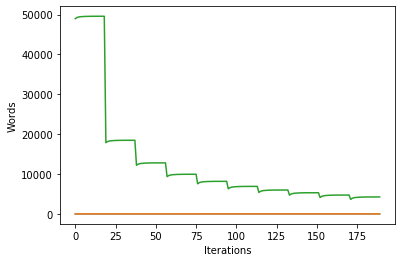

In [69]:
plt.plot(test_file)
plt.xlabel('Iterations')
plt.ylabel('Words')
plt.show()

In [70]:
# I want at least 10K words, so I'll go with this one:  [5, 0.19, 12578],

In [71]:
## Run NMF with parameters from vectorizer_list[17]: [5, 0.19, 12583]
vectorizer = CountVectorizer(stop_words=stopwords,binary=True, min_df=5, max_df=.19) 
doc_word = vectorizer.fit_transform(Pitchfork_tm.Contents)

In [72]:
vectorizer

CountVectorizer(analyzer='word', binary=True, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=0.19, max_features=None, min_df=5,
                ngram_range=(1, 1), preprocessor=None,
                stop_words=['i', 'me', 'my', 'myself', 'we', 'our', 'ours',
                            'ourselves', 'you', "you're", "you've", "you'll",
                            "you'd", 'your', 'yours', 'yourself', 'yourselves',
                            'he', 'him', 'his', 'himself', 'she', "she's",
                            'her', 'hers', 'herself', 'it', "it's", 'its',
                            'itself', ...],
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [73]:
pd.DataFrame(doc_word.toarray(), index=ex_label, columns=vectorizer.get_feature_names()).shape

(1187, 12599)

In [74]:
pd.DataFrame(doc_word.toarray(), index=ex_label, columns=vectorizer.get_feature_names()).sum().sort_values(ascending=True).describe()

count    12599.000000
mean        22.618779
std         30.222664
min          5.000000
25%          7.000000
50%         11.000000
75%         24.000000
max        225.000000
dtype: float64

Default run: 

We have 48337 words.

Our **average** word shows up in *8 docs*

Our **median (50%)** word shows up in *2 docs*

Customized run 2: vectorizer = CountVectorizer(stop_words=stopwords,binary=True, min_df=5, max_df=.19):
    
We have and 12602 words.

**Average** word shows up in *23 docs*.

**Median (50%)** word shows up in *11 docs*.

### Try 10 topics - 1 per Genre

In [75]:
Pitchfork_tm.Genre.value_counts()

Rock            378
Electronic      186
Rap             180
Pop/R&B         142
Experimental    119
Folk/Country     58
No genre         53
Jazz             36
Metal            26
Global            9
Name: Genre, dtype: int64

In [76]:
nmf_model = NMF(10)
doc_topic = nmf_model.fit_transform(doc_word)

In [77]:
topic_word = pd.DataFrame(nmf_model.components_.round(3),
             index = ["component_1","component_2","component_3","component_4","component_5","component_6","component_7","component_8","component_9","component_10"],
             columns = vectorizer.get_feature_names())
topic_word

,aaron,abandon,abandoned,abandoning,abandonment,abandons,abiding,abilities,ability,abject,able,ableton,abound,abrasive,abroad,abrupt,abruptly,absence,absent,absolute,absolutely,absorb,absorbed,absorbing,abstract,abstracted,abstraction,abstractions,absurd,absurdist,absurdity,abundance,abuse,abused,abusive,abyss,ac,academic,academy,accelerates,accelerating,accent,accents,accentuated,accentuates,accept,acceptance,accepted,accepting,access,accessibility,accessible,accident,accidental,accidentally,acclaim,acclaimed,accommodate,accompanied,accompanies,accompaniment,accompany,accompanying,accomplished,accomplishes,accordance,according,accordingly,accordion,account,accounts,accumulated,accurate,accurately,accused,accustomed,acerbic,ache,achieve,achieved,achievement,achieves,achieving,aching,achingly,acid,acidic,acknowledge,acknowledged,acknowledges,acknowledging,acknowledgment,acoustic,acoustics,acquired,acrobatic,acrobatics,act,acted,acting,action,actions,active,actively,activism,activist,activists,activities,activity,actor,actors,actress,acts,actual,actualization,actually,acumen,acute,acutely,ad,adam,adamant,adams,adaptation,adapted,adapting,add,added,addict,addiction,adding,addition,additional,addres,addresed,addreses,addresing,adds,adele,adept,adjacent,adjust,administration,admirable,admirably,admiration,admire,admired,admirers,admiring,admission,admit,admits,admitted,admittedly,admitting,adolescence,adolescent,adopted,adopting,adopts,adoration,adored,adoring,adorn,adrenaline,adrenalized,adrian,adrift,ads,adult,adulthood,adults,advance,advanced,advancing,advantage,adventure,adventures,adventurous,adventurousness,advertising,advice,advocate,aesthetic,aesthetically,aesthetics,afar,affair,affairs,affect,affectation,affecting,affection,affiliated,affiliation,affinity,affirmation,affirmations,affirming,afford,afforded,affords,afloat,aforementioned,afraid,africa,african,africas,afro,afrobeat,afropop,afterlife,aftermath,afternoon,aftertaste,afterthought,afterthoughts,age,aged,agency,agenda,agent,ages,aggression,aggressive,aggressively,aggro,agile,aging,agitated,agnostic,ago,agony,agree,agreed,ah,ahead,ai,aid,aided,aids,aim,aimed,aiming,aimless,aims,aint,air,aired,...,whites,whitney,whod,whoever,whole,wholesome,wholly,whos,whove,wicked,wide,widely,widening,wider,widescreen,widespread,wield,wielded,wielding,wields,wife,wild,wilderness,wildly,wildness,willalways,willand,willfully,william,williams,willie,willing,willingness,willow,wilson,wilsons,win,wind,winding,window,windows,winds,windshield,wine,wing,winged,wings,wink,winking,winner,winning,wins,winsome,winter,winters,wipe,wiped,wire,wired,wires,wiry,wisconsin,wisdom,wise,wisely,wiser,wish,wished,wishes,wishing,wispy,wistful,wit,witch,withdrawn,withdrew,within,withstand,witness,witty,wives,wizard,wizardry,wizards,wobble,wobbling,wobbly,woke,wolf,woman,womans,women,womens,wonder,wondered,wonderful,wonderfully,wondering,wonders,wondrous,wont,woo,wood,wooden,woods,woodstock,woodwind,woodwinds,woozy,wop,word,wordless,wordplay,wordy,wore,worked,worker,workers,working,workmanlike,workout,workouts,works,workshop,worldly,worlds,worldview,worldwide,worn,worried,worries,worry,worrying,worse,worship,worshipping,worst,worth,worthwhile,worthy,wouldnt,wouldve,wound,wounded,wounds,woven,wow,wracked,wrap,wrapped,wrapping,wreckage,wrenching,wrestle,wrestled,wrestles,wrestling,wretched,wring,wringing,wrings,wrist,writ,write,writer,writers,writes,writhing,writing,written,wrld,wrong,wrote,wrought,wry,wryly,wu,wyatt,xcx,xs,xx,xxl,xxxtentacion,ya,yacht,yachty,yall,yang,yard,yawns,ye,yeah,yeahs,yearn,yearning,yearns,yeezus,yell,yelling,yellow,yells,yelp,yelping,yelps,yes,yesterday,yg,yield,yielded,yielding,yields,yin,yip,yo,yoga,yore,youd,youkeep,youknow,youll,younger,youngest,youngs,yous,youth,youthful,youths,youtube,youve,yr,yung,yves,zack,zane,zaytoven,zealand,zedd,zeitgeist,zen,zenith,zeppelin,zero,zeroes,ziggy,zine,zombie,zombies,zone,zoo,zs
component_1,0.000,0.039,0.135,0.023,0.000,0.004,0.000,0.025,0.000

In [78]:
display_topics(nmf_model, vectorizer.get_feature_names(), 15) # number of words in topic


Topic  0
fans, guitarist, drummer, show, became, came, group, sounded, final, playing, indie, bit, cover, tour, felt

Topic  1
electronic, ambient, synths, dance, techno, rhythms, noise, beats, mix, percussion, club, based, melodies, experimental, slow

Topic  2
rapper, beats, lil, hiphop, rapping, produced, star, shit, features, baby, hook, flow, verses, guest, trap

Topic  3
someone, songwriter, shes, writing, emotional, songwriting, feeling, singing, alone, folk, closer, acoustic, indie, relationship, room

Topic  4
none, strange, cover, future, dream, steel, tone, youve, james, exactly, anyone, era, thought, mostly, works

Topic  5
recording, musicians, history, version, original, john, american, known, story, form, notes, playing, white, recordings, folk

Topic  6
singles, wrote, hits, culture, woman, women, girl, selling, shes, audience, dance, stars, writing, video, meant

Topic  7
gave, street, city, outside, police, fire, spirit, five, history, turn, bad, front, machine, new_

### What are these topics about?
- Topic 0 appears to be about guitarists, drummers, shows

- Topic 1 appears to be about electronic/dance and jazz music

- Topic 2 appears to be about rap & hiphop

- Topic 3 appears to be about songwriting and folk/indie music

- Topic 4 appears to be about the future of music?

- Topic 5 appears to be about women writers

- Topic 6 appears to be about singles/hits, indie and modern music

- Topic 7 appears to be about history, political, modern, american, and soundtrack music

- Topic 8 appears to be about poetic imagery? 

- Topic 9 appears to be about films, soundtrack, score, and composer

In [79]:
# Increase topic #s and see if you can get sub-genres
    # sofi tukker -> kygo

The H matrix shows us the documents we started with, and how each document is made up of the 2 resulting topics. In this case:
- The first document seems to be about music
- The last document seems to be about sports
- Everything in between is a combination of the two

In [80]:
H = pd.DataFrame(doc_topic.round(10),
             index = ex_label,
             columns = ["component_1","component_2","component_3","component_4","component_5","component_6","component_7","component_8","component_9","component_10"])
H = H.reset_index() # This looks better
H

,index,component_1,component_2,component_3,component_4,component_5,component_6,component_7,component_8,component_9,component_10
0,the kpop groups latest is part...,0.068842,0.177739,0.555011,0.004205,0.052447,0.000000,0.289642,0.051537,0.160880,0.000000
1,the danish dj courtesys label ...,0.000000,0.425489,0.031077,0.104649,0.058407,0.000000,0.000000,0.000000,0.000000,0.066998
2,the composer and jazz multi in...,0.000000,0.268097,0.127118,0.000000,0.027488,0.315029,0.058836,0.020272,0.083953,0.000000
3,rising new_york fixtures acemo...,0.000000,0.448231,0.177294,0.000000,0.054456,0.000000,0.000000,0.046362,0.001299,0.019171
4,on their latest collaboration ...,0.000000,0.212684,0.486449,0.037185,0.000000,0.086079,0.000000,0.007714,0.055443,0.026328
...,...,...,...,...,...,...,...,...,...,...,...
1182,despite trending toward pop in...,0.000000,0.220241,0.401924,0.000000,0.000000,0.000000,0.048249,0.000000,0.065052,0.000000
1183,on her supposedly final mixtap...,0.000000,0.142085,0.376934,0.045342,0.000000,0.000000,0.000000,0.023044,0.010375,0.090431
1184,though its undermined by its i...,0.000000,0.040759,0.524675,0.245591,0.000000,0.000000,0.064629,0.000000,0.035296,0.000000
1185,on an album that mines failed ...,0.035272,0.000000,0.031128,0.794474,0.012530,0.000000,0.000000,0.008624,0.000000,0.061134


### Masks for specific key where component_1 > Other Components

In [81]:
mask1 = ((H['component_1'] > H['component_2']) & (H['component_1'] > H['component_3']) & (H['component_1'] > H['component_4']) & (H['component_1'] > H['component_5']) & (H['component_1'] > H['component_6']) & (H['component_1'] > H['component_7']) & (H['component_1'] > H['component_8']) & (H['component_1'] > H['component_9']) & (H['component_1'] > H['component_10']))
H[mask1]

,index,component_1,component_2,component_3,component_4,component_5,component_6,component_7,component_8,component_9,component_10
8,type o negatives third albu...,1.278516,0.000000,0.000000,0.100395,0.011229,0.000000,0.276128,0.082067,0.000000,0.000000
10,the hardcore quartets minute...,0.286963,0.009071,0.000000,0.128704,0.000000,0.000000,0.031630,0.001022,0.000000,0.000000
55,alongside producer gil norton ...,0.179908,0.102523,0.128558,0.041380,0.007710,0.000000,0.000000,0.000000,0.039228,0.087228
94,wolf parades latest album play...,0.186057,0.059673,0.064792,0.142396,0.000000,0.051170,0.000000,0.000000,0.048296,0.072838
100,though the pennsylvania band f...,0.171084,0.125498,0.000000,0.083989,0.027353,0.118993,0.000000,0.000000,0.031350,0.027039
142,blink third album a defi...,1.173657,0.000000,0.040892,0.000000,0.000000,0.000000,0.615574,0.034032,0.113033,0.051072
181,the funky retro soul band aims...,0.140065,0.080046,0.119552,0.000000,0.000000,0.123403,0.000000,0.011950,0.000000,0.070005
213,an essential new vinyl box set...,1.016654,0.000000,0.000000,0.558077,0.105574,0.000000,0.188434,0.000000,0.000000,0.000000
217,my chemical romances second...,1.149652,0.000000,0.114779,0.251117,0.006582,0.000000,0.000000,0.048025,0.000000,0.000000
236,with their skate punk shout al...,0.179096,0.110288,0.147931,0.158972,0.061297,0.000000,0.000000,0.000000,0.014900,0.115968


In [82]:
H[mask1].count()

index           84
component_1     84
component_2     84
component_3     84
component_4     84
component_5     84
component_6     84
component_7     84
component_8     84
component_9     84
component_10    84
dtype: int64

In [83]:
Pitchfork_tm.index[H[mask1].index]

Index(['8', '10', '55', '94', '100', '142', '181', '213', '217', '236', '270', '282', '304', '325', '329', '351', '381', '382', '385', '395', '398', '399', '401', '407', '408', '422', '429', '433', '441', '445', '459', '471', '479', '486', '488', '508', '518', '533', '556', '574', '599', '636', '673', '679', '715', '753', '760', '761', '768', '770', '787', '792', '798', '811', '840', '861', '862', '889', '907', '911', '915', '918', '920', '922', '923', '924', '944', '946', '965', '970', '1035', '1042', '1047', '1068', '1073', '1096', '1102', '1108', '1117', '1121', '1137', '1153', '1164', '1167'], dtype='object')

In [84]:
# Print the articles for those reviews
index_pos1 = Pitchfork_tm.index[H[mask1].index]

#### Do these component_1 albums appear to be similar?

In [85]:
Pitchfork_tm.iloc[index_pos1].head()

,Author,Artist,Album_Name,Genre,Score,Contents
8,Chris O'Connell,Type O Negative,Bloody Kisses,Metal,8.7,type o negatives third album a brooding an...
10,Quinn Moreland,Soakie,Soakie,Rock,8.0,the hardcore quartets minute debut skewers a...
55,Ian Cohen,Higher Power,27 Miles Underwater,Rock,7.0,alongside producer gil norton whose work defi...
94,Evan Rytlewski,Wolf Parade,Thin Mind,Rock,6.5,wolf parades latest album plays like the big l...
100,Ian Cohen,String Machine,Death of the Neon,Folk/Country,7.1,though the pennsylvania band favor post rock s...


In [86]:
Pitchfork_component1 = Pitchfork_tm.iloc[index_pos1]
Pitchfork_component1.head()

,Author,Artist,Album_Name,Genre,Score,Contents
8,Chris O'Connell,Type O Negative,Bloody Kisses,Metal,8.7,type o negatives third album a brooding an...
10,Quinn Moreland,Soakie,Soakie,Rock,8.0,the hardcore quartets minute debut skewers a...
55,Ian Cohen,Higher Power,27 Miles Underwater,Rock,7.0,alongside producer gil norton whose work defi...
94,Evan Rytlewski,Wolf Parade,Thin Mind,Rock,6.5,wolf parades latest album plays like the big l...
100,Ian Cohen,String Machine,Death of the Neon,Folk/Country,7.1,though the pennsylvania band favor post rock s...


In [87]:
# Are the genres mostly consistent? Yea, the majority are rock. 
Pitchfork_component1.Genre.value_counts()

Rock            65
Metal           12
No genre         3
Electronic       1
Pop/R&B          1
Experimental     1
Folk/Country     1
Name: Genre, dtype: int64

**Remember, Component 1 = Topic 0:**

playing, fans, played, became, came, drummer, recording, guitarist, told, shows, five, took, cover, show, group

Top Genre: Rock

This seems to match nicely. 

In [90]:
Pitchfork_component1['Score'] = Pitchfork_component1['Score'].apply(pd.to_numeric, downcast='float', errors='coerce')

/home/jcnachman/anaconda3/envs/metis/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [91]:
# Are the scores mostly consistent? Yes, mean & median(50%) are very close
Pitchfork_component1.Score.describe()

count    84.000000
mean      7.588095
std       0.903194
min       4.800000
25%       7.175000
50%       7.700000
75%       8.025000
max       9.500000
Name: Score, dtype: float64

**_Let's do this with the other component types_**:
### Masks for specific key where component_2 > Other Components

In [92]:
mask2 = ((H['component_2'] > H['component_1']) & (H['component_2'] > H['component_3']) & (H['component_2'] > H['component_4']) & (H['component_2'] > H['component_5']) & (H['component_2'] > H['component_6']) & (H['component_2'] > H['component_7']) & (H['component_2'] > H['component_8']) & (H['component_2'] > H['component_9']) & (H['component_2'] > H['component_10']))
H[mask2]

,index,component_1,component_2,component_3,component_4,component_5,component_6,component_7,component_8,component_9,component_10
1,the danish dj courtesys label ...,0.000000,0.425489,0.031077,0.104649,0.058407,0.000000,0.000000,0.000000,0.000000,0.066998
3,rising new_york fixtures acemo...,0.000000,0.448231,0.177294,0.000000,0.054456,0.000000,0.000000,0.046362,0.001299,0.019171
7,marco del rios song are full o...,0.079457,0.190202,0.000000,0.120575,0.093064,0.000000,0.000000,0.018264,0.022412,0.030227
11,on their second album the met...,0.177291,0.232977,0.000000,0.085539,0.000000,0.000000,0.043300,0.000000,0.018330,0.000000
15,assisted by the falls late mar...,0.087817,0.188927,0.028882,0.084766,0.007257,0.102704,0.020263,0.082450,0.062129,0.009877
22,using a fanciful palette of ch...,0.035598,0.323507,0.035397,0.205394,0.020349,0.000000,0.018057,0.000000,0.000000,0.000000
23,the veteran djs first solo ep ...,0.000000,0.523395,0.000000,0.171215,0.041007,0.000000,0.079625,0.026632,0.000000,0.000000
25,the new_york city based concep...,0.000000,0.374337,0.141722,0.149327,0.000000,0.036498,0.000000,0.000000,0.119915,0.000000
31,on his fourth album kevin par...,0.116255,0.393262,0.199972,0.329012,0.000000,0.011541,0.000000,0.035276,0.000000,0.271014
32,a new classical sextet known f...,0.000000,0.309078,0.045490,0.007686,0.000000,0.228826,0.000444,0.000000,0.048342,0.002340


In [93]:
H[mask2].count()

index           336
component_1     336
component_2     336
component_3     336
component_4     336
component_5     336
component_6     336
component_7     336
component_8     336
component_9     336
component_10    336
dtype: int64

In [94]:
index_pos2 = Pitchfork_tm.index[H[mask2].index]

In [95]:
# Print the articles for those reviews
Pitchfork_tm.iloc[index_pos2].head()

,Author,Artist,Album_Name,Genre,Score,Contents
1,Ruth Saxelby,Various Artists,Kulør 006,Electronic,7.5,the danish dj courtesys label pivots from cope...
3,Andy Beta,AceMoMA,A New Dawn,Electronic,7.6,rising new_york fixtures acemo and moma ready ...
7,Colin Joyce,Raspberry Bulbs,Before the Age of Mirrors,No genre,7.1,marco del rios song are full of riffs that bec...
11,Noah Yoo,Loathe,I Let It In and It Took Everything,Metal,7.8,on their second album the metalcore band wide...
15,Robert Ham,Jan St. Werner,Molocular Meditation,Electronic,6.8,assisted by the falls late mark e smith the ...


In [96]:
Pitchfork_component2 = Pitchfork_tm.iloc[index_pos2]
Pitchfork_component2.head()

,Author,Artist,Album_Name,Genre,Score,Contents
1,Ruth Saxelby,Various Artists,Kulør 006,Electronic,7.5,the danish dj courtesys label pivots from cope...
3,Andy Beta,AceMoMA,A New Dawn,Electronic,7.6,rising new_york fixtures acemo and moma ready ...
7,Colin Joyce,Raspberry Bulbs,Before the Age of Mirrors,No genre,7.1,marco del rios song are full of riffs that bec...
11,Noah Yoo,Loathe,I Let It In and It Took Everything,Metal,7.8,on their second album the metalcore band wide...
15,Robert Ham,Jan St. Werner,Molocular Meditation,Electronic,6.8,assisted by the falls late mark e smith the ...


In [97]:
# Are the genres mostly consistent? Yea, the majority are electronic. Then experimental then rock. 
Pitchfork_component2.Genre.value_counts()

Electronic      140
Experimental     80
Rock             56
No genre         17
Jazz             14
Pop/R&B          12
Metal             9
Global            5
Folk/Country      3
Name: Genre, dtype: int64

**Remember, Component 2 = Topic  1:**

electronic, ambient, synths, dance, techno, melody, jazz, beats, mix, rhythms, percussion, deep, experimental, noise, piece

Top Genre: electronic.

This seems to match up too.

In [98]:
for pc in Pitchfork_component2.Contents:
    print(pc)

the danish dj courtesys label pivots from copenhagens fast techno sound to a more nuanced and mysterious snapshot of the citys electronic sounds  featured tracks play track   to levende vsener  minais bvia bandcamp   buyhumor and heartbreak are two sides of the same coin  both invoke the absurdity of being alive  at least  thats what kulr   has me feeling  the second compilation on danish dj and creative director courtesys label kulr  it showcases the work of local producers and musicians from her hometown  copenhagen  the first  kulr    was a snapshot of the citys fast techno scene  which has more in common with trance motifs and rave aesthetics than it does berlins minimal take on the detroit sound  courtesy used to co run another label  ectotherm  that centered on this particular facet of copenhagen dance music  but it wound down in    she started kulr the same year with the intention of exploring a wider sonic palette  which is where kulr   steps in  kulr  she explained in an inter

In [99]:
Pitchfork_component2.dtypes

Author        object
Artist        object
Album_Name    object
Genre         object
Score         object
Contents      object
dtype: object

In [100]:
Pitchfork_component2['Score'] = Pitchfork_component2['Score'].apply(pd.to_numeric, downcast='float', errors='coerce')

/home/jcnachman/anaconda3/envs/metis/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [101]:
Pitchfork_component2['Score_int'] = Pitchfork_component2['Score'].astype(int)

/home/jcnachman/anaconda3/envs/metis/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [102]:
Pitchfork_component2.dtypes

Author         object
Artist         object
Album_Name     object
Genre          object
Score         float64
Contents       object
Score_int       int64
dtype: object

In [103]:
# Are the scores mostly consistent? Yes, mean & median(50%) are very close
Pitchfork_component2.Score_int.describe()

count    336.000000
mean       6.946429
std        0.731051
min        5.000000
25%        7.000000
50%        7.000000
75%        7.000000
max        9.000000
Name: Score_int, dtype: float64

### Masks for specific key where component_3 > Other Components

In [104]:
mask3 = ((H['component_3'] > H['component_1']) & (H['component_3'] > H['component_2']) & (H['component_3'] > H['component_4']) & (H['component_3'] > H['component_5']) & (H['component_3'] > H['component_6']) & (H['component_3'] > H['component_7']) & (H['component_3'] > H['component_8']) & (H['component_3'] > H['component_9']) & (H['component_3'] > H['component_10']))
H[mask3]

,index,component_1,component_2,component_3,component_4,component_5,component_6,component_7,component_8,component_9,component_10
0,the kpop groups latest is part...,0.068842,0.177739,0.555011,0.004205,0.052447,0.000000,0.289642,0.051537,0.160880,0.000000
4,on their latest collaboration ...,0.000000,0.212684,0.486449,0.037185,0.000000,0.086079,0.000000,0.007714,0.055443,0.026328
21,after a mixtape staking his cl...,0.000000,0.094871,0.696118,0.000000,0.000000,0.000000,0.013474,0.000000,0.045623,0.002153
29,the maryland crooners dreamy r...,0.058487,0.000000,0.239318,0.233132,0.030790,0.000000,0.000000,0.000000,0.000000,0.033270
35,on his collaboration with kenn...,0.000000,0.089995,0.694691,0.000000,0.000000,0.000000,0.015514,0.025105,0.009059,0.000000
36,the rising brooklyn rapper new...,0.013133,0.141164,0.454652,0.089325,0.004978,0.000000,0.000000,0.018189,0.000000,0.018553
40,the enigmatic rapper debut lp ...,0.028835,0.010016,0.318828,0.279538,0.000000,0.122251,0.000000,0.000000,0.000000,0.071476
48,the memphis rapper offers hard...,0.006822,0.000000,0.412630,0.063561,0.000000,0.000000,0.000000,0.136047,0.031412,0.045766
49,the earl sweatshirt collaborat...,0.000000,0.155412,0.381866,0.110689,0.000000,0.107115,0.000000,0.000000,0.000000,0.000000
56,working with lil peep collabor...,0.036095,0.017404,0.744740,0.034685,0.000000,0.000000,0.000000,0.060536,0.000000,0.014850


In [105]:
H[mask3].count()

index           233
component_1     233
component_2     233
component_3     233
component_4     233
component_5     233
component_6     233
component_7     233
component_8     233
component_9     233
component_10    233
dtype: int64

In [106]:
Pitchfork_tm.index[H[mask3].index]

Index(['0', '4', '21', '29', '35', '36', '40', '48', '49', '56',
       ...
       '1165', '1168', '1177', '1178', '1180', '1181', '1182', '1183', '1184', '1186'], dtype='object', length=233)

In [107]:
index_pos3 = Pitchfork_tm.index[H[mask3].index]

In [108]:
# Print the articles for those reviews
Pitchfork_component3 = Pitchfork_tm.iloc[index_pos3]
Pitchfork_component3.head()

,Author,Artist,Album_Name,Genre,Score,Contents
0,Sheldon Pearce,BTS,Map of the Soul: 7,Pop/R&B,6.3,the kpop groups latest is part memoir part fa...
4,Paul A. Thompson,Boldy James,The Price of Tea in China,Rap,8.0,on their latest collaboration the detroit rap...
21,Nathan Smith,10k.Caash,Planet Swajjur,Rap,6.2,after a mixtape staking his claim to the woah ...
29,Alphonse Pierre,Brent Faiyaz,Fuck the World,Pop/R&B,7.5,the maryland crooners dreamy r&b portrays a wo...
35,Alphonse Pierre,Denzel Curry / Kenny Beats,Unlocked,Rap,7.2,on his collaboration with kenny beats the mia...


In [109]:
# Are the genres mostly consistent? Yes, rap is by far the most frequent genre for this topic.
Pitchfork_component3.Genre.value_counts()

Rap             164
Pop/R&B          35
Rock              9
No genre          8
Electronic        7
Experimental      3
Global            3
Metal             2
Jazz              2
Name: Genre, dtype: int64

**Remember, Component 3 = Topic  2:**

rapper, beats, lil, hiphop, rapping, shit, produced, star, flow, verse, verses, features, trying, baby, hook

Top Genre: rap

This matches up too.

In [111]:
Pitchfork_component3.dtypes

Author        object
Artist        object
Album_Name    object
Genre         object
Score         object
Contents      object
dtype: object

In [112]:
Pitchfork_component3['Score'] = Pitchfork_component3['Score'].apply(pd.to_numeric, downcast='float', errors='coerce')

/home/jcnachman/anaconda3/envs/metis/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [113]:
Pitchfork_component3['Score_int'] = Pitchfork_component3['Score'].astype(int)

/home/jcnachman/anaconda3/envs/metis/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [114]:
Pitchfork_component3.dtypes

Author         object
Artist         object
Album_Name     object
Genre          object
Score         float64
Contents       object
Score_int       int64
dtype: object

In [115]:
# Are the scores mostly consistent? Yea, mean and median (50%) are pretty close
Pitchfork_component3.Score_int.describe()

count    233.000000
mean       6.287554
std        1.265820
min        2.000000
25%        6.000000
50%        7.000000
75%        7.000000
max        8.000000
Name: Score_int, dtype: float64

### Masks for specific key where component_4 > Other Components

In [116]:
mask4 = ((H['component_4'] > H['component_1']) & (H['component_4'] > H['component_2']) & (H['component_4'] > H['component_3']) & (H['component_4'] > H['component_5']) & (H['component_4'] > H['component_6']) & (H['component_4'] > H['component_7']) & (H['component_4'] > H['component_8']) & (H['component_4'] > H['component_9']) & (H['component_4'] > H['component_10']))
H[mask4]

,index,component_1,component_2,component_3,component_4,component_5,component_6,component_7,component_8,component_9,component_10
6,on his solo album the london ...,0.036675,0.243476,0.038982,0.281235,0.000000,0.000000,0.042779,0.000000,0.017424,0.000000
9,the band new lp is a rosily op...,0.119566,0.102801,0.029030,0.501362,0.000000,0.000000,0.216102,0.044934,0.052906,0.000000
14,the afghan whigs leaders debut...,0.055272,0.136673,0.041220,0.143965,0.000000,0.031955,0.000000,0.000000,0.053966,0.089484
16,the lanky london outlaw with c...,0.066338,0.110504,0.000000,0.379808,0.051150,0.076401,0.037227,0.036231,0.011760,0.037780
17,the duo continue their drift f...,0.136821,0.024181,0.070273,0.203651,0.099309,0.000000,0.007256,0.000000,0.000000,0.080666
19,maya bons diaristic bedroom ro...,0.000000,0.054206,0.047430,0.323406,0.006492,0.000000,0.037090,0.000000,0.000000,0.003044
24,the pop star returns with a gr...,0.000000,0.000000,0.277990,0.460592,0.000000,0.000000,0.189951,0.081269,0.000000,0.219967
27,the oklahoma roots songwriter ...,0.000000,0.035266,0.000000,0.525287,0.002445,0.013547,0.091291,0.122083,0.000000,0.076219
30,setting aside the retro r&b va...,0.072368,0.031546,0.045469,0.289833,0.037987,0.104542,0.024163,0.000000,0.000000,0.019550
33,on their fourth solo release i...,0.158394,0.253153,0.000000,0.339787,0.000000,0.038775,0.072353,0.000000,0.007924,0.000000


In [117]:
H[mask4].count()

index           367
component_1     367
component_2     367
component_3     367
component_4     367
component_5     367
component_6     367
component_7     367
component_8     367
component_9     367
component_10    367
dtype: int64

In [118]:
Pitchfork_tm.index[H[mask4].index]

Index(['6', '9', '14', '16', '17', '19', '24', '27', '30', '33',
       ...
       '1154', '1155', '1160', '1163', '1166', '1169', '1174', '1175', '1176', '1185'], dtype='object', length=367)

In [119]:
index_pos4 = Pitchfork_tm.index[H[mask4].index]

In [120]:
# Print the articles for those reviews
Pitchfork_component4 = Pitchfork_tm.iloc[index_pos4]
Pitchfork_component4.head()

,Author,Artist,Album_Name,Genre,Score,Contents
6,Jemima Skala,Sega Bodega,Salvador,Electronic,7.2,on his solo album the london producer cloaks ...
9,Arielle Gordon,Best Coast,Always Tomorrow,Rock,6.5,the band new lp is a rosily optimistic record ...
14,Stuart Berman,Greg Dulli,Random Desire,Rock,7.3,the afghan whigs leaders debut solo album bala...
16,Jazz Monroe,King Krule,Man Alive!,Rock,7.7,the lanky london outlaw with cement mixer lung...
17,Evan Rytlewski,Tennis,Swimmer,Rock,6.9,the duo continue their drift from lofi throwba...


In [121]:
# Are the genres mostly consistent? Yes, rock is by far the highest, then pop/r&b.
Pitchfork_component4.Genre.value_counts()

Rock            195
Pop/R&B          62
Folk/Country     38
Experimental     24
Electronic       23
Rap              12
No genre          8
Metal             3
Jazz              2
Name: Genre, dtype: int64

**Remember, Component 4 = Topic  3:**

songwriter, someone, writing, shes, emotional, songwriting, singing, indie, folk, acoustic, alone, closer, room, relationship, finds

Top Genre: Rock

In [123]:
Pitchfork_component4.dtypes

Author        object
Artist        object
Album_Name    object
Genre         object
Score         object
Contents      object
dtype: object

In [124]:
Pitchfork_component4['Score'] = Pitchfork_component4['Score'].apply(pd.to_numeric, downcast='float', errors='coerce')

/home/jcnachman/anaconda3/envs/metis/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [125]:
Pitchfork_component4['Score_int'] = Pitchfork_component4['Score'].astype(int)

/home/jcnachman/anaconda3/envs/metis/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [126]:
Pitchfork_component4.dtypes

Author         object
Artist         object
Album_Name     object
Genre          object
Score         float64
Contents       object
Score_int       int64
dtype: object

In [127]:
# Are the scores mostly consistent? Yea, mean and median (50%) are close enough
Pitchfork_component4.Score_int.describe()

count    367.000000
mean       6.683924
std        0.954333
min        3.000000
25%        6.000000
50%        7.000000
75%        7.000000
max        9.000000
Name: Score_int, dtype: float64

### Masks for specific key where component_5 > Other Components

In [128]:
mask5 = ((H['component_5'] > H['component_1']) & (H['component_5'] > H['component_2']) & (H['component_5'] > H['component_3']) & (H['component_5'] > H['component_4']) & (H['component_5'] > H['component_6']) & (H['component_5'] > H['component_7']) & (H['component_5'] > H['component_8']) & (H['component_5'] > H['component_9']) & (H['component_5'] > H['component_10']))
H[mask5]

,index,component_1,component_2,component_3,component_4,component_5,component_6,component_7,component_8,component_9,component_10
28,the klfs sample heavy dream...,0.000000,0.00000,0.0,0.0,5.119608,0.0,0.000000,0.0,0.000000,0.0
938,an album that changed ambie...,0.322354,0.44287,0.0,0.0,2.333438,0.0,0.302983,0.0,0.158364,0.0


**Interesting, just two albums**

In [129]:
Pitchfork_tm.index[H[mask5].index]

Index(['28', '938'], dtype='object')

In [130]:
index_pos5 = Pitchfork_tm.index[H[mask5].index]

In [131]:
# Print the articles for those reviews
Pitchfork_component5 = Pitchfork_tm.iloc[index_pos5]
Pitchfork_component5

,Author,Artist,Album_Name,Genre,Score,Contents
28,Philip Sherburne,The KLF,Chill Out,Electronic,8.9,the klfs sample heavy dreamscape one of th...
938,Philip Sherburne,Aphex Twin,Selected Ambient Works Volume II,Electronic,10,an album that changed ambient music forever...


In [132]:
# Are the genres mostly consistent? Well, there's only one.
Pitchfork_component5.Genre.value_counts()

Electronic    2
Name: Genre, dtype: int64

**Remember, Component 5 = Topic  4:**

acoustic, mood, strange, soul, deep, future, cover, heard, voices, turns, radio, lost, works, dream, form

Top Genre: Electronic

Score is in the 8s out of 10.

### Masks for specific key where component_6 > Other Components

In [133]:
mask6 = ((H['component_6'] > H['component_1']) & (H['component_6'] > H['component_2']) & (H['component_6'] > H['component_3']) & (H['component_6'] > H['component_4']) & (H['component_6'] > H['component_5']) & (H['component_6'] > H['component_7']) & (H['component_6'] > H['component_8']) & (H['component_6'] > H['component_9']) & (H['component_6'] > H['component_10']))
H[mask6]

,index,component_1,component_2,component_3,component_4,component_5,component_6,component_7,component_8,component_9,component_10
2,the composer and jazz multi in...,0.000000,0.268097,0.127118,0.000000,0.027488,0.315029,0.058836,0.020272,0.083953,0.000000
5,the latest in springsteens vin...,0.097585,0.000000,0.047229,0.119872,0.000000,1.010459,0.000000,0.119263,0.000000,0.223374
18,two archival releases highligh...,0.007606,0.232773,0.000000,0.000000,0.004702,0.878364,0.000000,0.036163,0.000000,0.174464
20,with its mix of rustic lullabi...,0.165177,0.146512,0.000000,0.111922,0.019658,0.174608,0.000000,0.000000,0.030898,0.001727
26,the instrumental duo go all in...,0.000000,0.144800,0.017373,0.134397,0.034512,0.210553,0.000000,0.024282,0.010521,0.113435
51,buffy sainte maries cosmic ...,0.000000,0.000000,0.000000,0.151806,0.000000,2.307925,0.000000,0.000000,0.000000,0.000000
53,with cover song and a couple o...,0.051803,0.000000,0.000000,0.008857,0.001123,0.347204,0.173541,0.000000,0.065473,0.031291
54,the chicago drummer and produc...,0.037049,0.104684,0.017230,0.524157,0.166923,0.545884,0.000000,0.085795,0.095137,0.076098
91,with the help of collaborators...,0.000000,0.069816,0.000000,0.233059,0.000000,0.499591,0.000000,0.000000,0.000000,0.039450
98,a pure and quiet record fro...,0.331323,0.000000,0.000000,0.502772,0.000000,1.207979,0.219229,0.076921,0.066840,0.000000


In [134]:
Pitchfork_tm.index[H[mask6].index]

Index(['2', '5', '18', '20', '26', '51', '53', '54', '91', '98',
       ...
       '1095', '1097', '1101', '1130', '1138', '1141', '1142', '1144', '1171', '1172'], dtype='object', length=119)

In [135]:
index_pos6 = Pitchfork_tm.index[H[mask6].index]

In [136]:
# Print the articles for those reviews
Pitchfork_component6 = Pitchfork_tm.loc[index_pos6]
Pitchfork_component6

,Author,Artist,Album_Name,Genre,Score,Contents
2,Cat Zhang,Sunny Jain,Wild Wild East,Experimental,6.8,the composer and jazz multi instrumentalist ex...
5,Sam Sodomsky,Bruce Springsteen / The E Street Band,The Rising / Devils & Dust / Live in New York ...,Rock,8.2,the latest in springsteens vinyl reissue serie...
18,Andy Beta,Rashied Ali / Frank Lowe / Rashied Ali Quintet,First Time Out: Live at Slugs 1967 / Duo Excha...,Experimental,8.0,two archival releases highlight the range of j...
20,Stuart Berman,The Men,Mercy,Rock,7.2,with its mix of rustic lullabies and blown out...
26,Steven Arroyo,Elkhorn,The Storm Sessions,Rock,6.2,the instrumental duo go all in on the possibil...
51,Lindsay Zoladz,Buffy Sainte-Marie,Illuminations,Rock,9.0,buffy sainte maries cosmic groundbreaking ...
53,Alfred Soto,Bryan Ferry,"Live at the Royal Albert Hall, 1974",Electronic,7.5,with cover song and a couple of originals thi...
54,Mark Richardson,Gil Scott-Heron / Makaya McCraven,We’re New Again: A Reimagining by Makaya McCraven,Jazz,8.6,the chicago drummer and producer transforms gi...
91,Abigail Covington,Terry Allen & the Panhandle Mystery Band,Just Like Moby Dick,Folk/Country,7.6,with the help of collaborators the year old...
98,Sam Sodomsky,Dixie Chicks,Home,Folk/Country,8.1,a pure and quiet record from when the di...


In [137]:
# Are the genres mostly consistent? Yea, mostly pop/r&b
Pitchfork_component6.Genre.value_counts()

Rock            40
Jazz            18
No genre        15
Folk/Country    14
Experimental    11
Pop/R&B         10
Electronic       8
Rap              2
Global           1
Name: Genre, dtype: int64

**Remember, Component 6 = Topic  5:**

woman, girl, wrote, women, stars, shes, put, written, became, going, culture, told, audience, american, wanted

Top Genre: Pop/R&B

In [138]:
Pitchfork_component6.dtypes

Author        object
Artist        object
Album_Name    object
Genre         object
Score         object
Contents      object
dtype: object

In [139]:
Pitchfork_component6['Score'] = Pitchfork_component6['Score'].apply(pd.to_numeric, downcast='float', errors='coerce')

In [140]:
Pitchfork_component6['Score_int'] = Pitchfork_component6['Score'].astype(int)

In [141]:
# Are the scores mostly consistent? Yea, mean and median (50%) are very close
Pitchfork_component6['Score_int'].describe()

count    119.000000
mean       7.420168
std        1.061625
min        4.000000
25%        7.000000
50%        7.000000
75%        8.000000
max       10.000000
Name: Score_int, dtype: float64

### Masks for specific key where component_7 > Other Components

In [142]:
mask7 = ((H['component_7'] > H['component_1']) & (H['component_7'] > H['component_2']) & (H['component_7'] > H['component_3']) & (H['component_7'] > H['component_4']) & (H['component_7'] > H['component_5']) & (H['component_7'] > H['component_6']) & (H['component_7'] > H['component_8']) & (H['component_7'] > H['component_9']) & (H['component_7'] > H['component_10']))
H[mask7]

,index,component_1,component_2,component_3,component_4,component_5,component_6,component_7,component_8,component_9,component_10
13,the uk singer songwriters al...,0.264364,0.000000,0.008868,0.317421,0.082759,0.050024,0.564283,0.028570,0.073653,0.108113
74,shakiras big crossover reco...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.550028,0.000000,0.000000,0.000000
106,written from her own perspecti...,0.000000,0.042832,0.130238,0.308623,0.000000,0.000000,0.397281,0.025164,0.071572,0.000000
146,the second album written prod...,0.002024,0.123292,0.231778,0.011973,0.027568,0.033931,0.309306,0.007098,0.029950,0.079931
267,steely dan from their early c...,0.271785,0.000000,0.000000,0.323968,0.048349,0.032232,0.395873,0.102070,0.000000,0.354416
317,six years after their&breakout...,0.129111,0.122501,0.034908,0.235396,0.007981,0.000000,0.281205,0.000000,0.170828,0.133608
347,the viral phenoms full length ...,0.062482,0.087476,0.148840,0.222327,0.000000,0.104893,0.506465,0.000000,0.032264,0.120951
369,with harmonized guitars sprin...,0.155501,0.024966,0.209350,0.000000,0.047131,0.000000,0.300711,0.000000,0.116532,0.105654
375,the debut album by the go_g...,0.867267,0.000000,0.000000,0.000000,0.000000,0.000000,0.883342,0.203479,0.000000,0.000000
447,an essential greatest hits ...,0.000000,0.227382,0.000000,0.000000,0.000000,0.000000,3.009339,0.000000,0.000000,0.000000


In [143]:
Pitchfork_tm.index[H[mask7].index]

Index(['13', '74', '106', '146', '267', '317', '347', '369', '375', '447', '519', '561', '583', '584', '585', '622', '697', '704', '734', '797', '817', '887', '901', '985', '1015', '1025', '1040', '1067', '1093', '1125', '1145', '1170'], dtype='object')

In [144]:
index_pos7 = Pitchfork_tm.index[H[mask7].index]

In [145]:
# Print the articles for those reviews
Pitchfork_component7 = Pitchfork_tm.loc[index_pos7]
Pitchfork_component7.head()

,Author,Artist,Album_Name,Genre,Score,Contents
13,Ian Cohen,David Gray,White Ladder (20th Anniversary Edition),Pop/R&B,7.9,the uk singer songwriters album remains a ph...
74,Isabelia Herrera,Shakira,Laundry Service,Pop/R&B,7.6,shakiras big crossover record that revealed...
106,Rawiya Kameir,Halsey,Manic,Pop/R&B,6.5,written from her own perspective halseys thir...
146,Anna Gaca,Georgia,Seeking Thrills,Pop/R&B,6.8,the second album written produced and perfor...
267,Amanda Petrusich,Steely Dan,Aja,Rock,10,steely dan from their early classic rock stap...


In [146]:
# Are the genres mostly consistent? Yes, mostly rock.
Pitchfork_component7.Genre.value_counts()

Pop/R&B         20
Rock             5
Electronic       4
Folk/Country     2
Rap              1
Name: Genre, dtype: int64

**Remember, Component 7 = Topic  6:**

singles, singing, group, radio, indie, help, major, version, sing, modern, hits, means, collection, whole, anthems

In [147]:
Pitchfork_component7.dtypes

Author        object
Artist        object
Album_Name    object
Genre         object
Score         object
Contents      object
dtype: object

In [148]:
Pitchfork_component7['Score'] = Pitchfork_component7['Score'].apply(pd.to_numeric, downcast='float', errors='coerce')

In [149]:
Pitchfork_component7['Score_int'] = Pitchfork_component7['Score'].astype(int)

In [150]:
# Are the scores mostly consistent? Yes, the average and median (50%) are pretty close
Pitchfork_component7['Score_int'].describe()

count    32.000000
mean      7.218750
std       1.184153
min       6.000000
25%       6.000000
50%       7.000000
75%       8.000000
max      10.000000
Name: Score_int, dtype: float64

### Masks for specific key where component_8 > Other Components

In [151]:
mask8 = ((H['component_8'] > H['component_1']) & (H['component_8'] > H['component_2']) & (H['component_8'] > H['component_3']) & (H['component_8'] > H['component_4']) & (H['component_8'] > H['component_5']) & (H['component_8'] > H['component_6']) & (H['component_8'] > H['component_7']) & (H['component_8'] > H['component_9']) & (H['component_8'] > H['component_10']))
H[mask8]

,index,component_1,component_2,component_3,component_4,component_5,component_6,component_7,component_8,component_9,component_10
58,the pop punk stalwarts resist ...,0.095145,0.000000,0.105264,0.000000,0.033483,0.104298,0.055547,0.139266,0.065478,0.000000
194,the timeless debut from d...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.340279,0.000000,0.000000
1004,the steely dublin post punk ba...,0.096301,0.134437,0.099331,0.198792,0.074873,0.000000,0.039992,0.235726,0.106760,0.079406


In [152]:
Pitchfork_tm.index[H[mask8].index]

Index(['58', '194', '1004'], dtype='object')

In [153]:
index_pos8 = Pitchfork_tm.index[H[mask8].index]

In [154]:
# Print the articles for those reviews
Pitchfork_component8 = Pitchfork_tm.iloc[index_pos8]
Pitchfork_component8

,Author,Artist,Album_Name,Genre,Score,Contents
58,Evan Rytlewski,Green Day,Father of All...,Rock,6.7,the pop punk stalwarts resist political commen...
194,Sheldon Pearce,Dr. Dre,The Chronic,Rap,10,the timeless debut from dr dre a histor...
1004,Stuart Berman,Fontaines D.C.,Dogrel,Rock,8.0,the steely dublin post punk band infuse the bi...


In [155]:
# Are the genres mostly consistent? Not really.
Pitchfork_component8.Genre.value_counts()

Rock    2
Rap     1
Name: Genre, dtype: int64

**Remember, Component 8 = Topic 7:**

history, american, white, political, experience, modern, inspired, art, change, rest, era, perhaps, soundtrack, side, free

In [156]:
Pitchfork_component8.dtypes

Author        object
Artist        object
Album_Name    object
Genre         object
Score         object
Contents      object
dtype: object

In [157]:
Pitchfork_component8['Score'] = Pitchfork_component8['Score'].apply(pd.to_numeric, downcast='float', errors='coerce')

/home/jcnachman/anaconda3/envs/metis/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [158]:
Pitchfork_component8['Score_int'] = Pitchfork_component8['Score'].astype(int)

/home/jcnachman/anaconda3/envs/metis/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [159]:
# Are scores consistent? Yes, mean and median (50%) are pretty close
Pitchfork_component8['Score_int'].describe()

count     3.0
mean      8.0
std       2.0
min       6.0
25%       7.0
50%       8.0
75%       9.0
max      10.0
Name: Score_int, dtype: float64

### Masks for specific key where component_9 > Other Components

In [160]:
mask9 = ((H['component_9'] > H['component_1']) & (H['component_9'] > H['component_2']) & (H['component_9'] > H['component_3']) & (H['component_9'] > H['component_4']) & (H['component_9'] > H['component_5']) & (H['component_9'] > H['component_6']) & (H['component_9'] > H['component_7']) & (H['component_9'] > H['component_8']) & (H['component_9'] > H['component_10']))
H[mask9]

,index,component_1,component_2,component_3,component_4,component_5,component_6,component_7,component_8,component_9,component_10
12,grimes first project as a bona...,0.029684,0.066335,0.281024,0.354361,0.0,0.000000,0.263076,0.023241,0.361278,0.0
166,peter gabriels art pop ma...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,5.471267,0.0
597,equal parts manifesto and crit...,0.000000,0.089321,0.035357,0.127682,0.0,0.119436,0.000000,0.136382,0.153833,0.0


**Interesting, just a few albums.**



In [161]:
Pitchfork_tm.index[H[mask9].index]

Index(['12', '166', '597'], dtype='object')

In [162]:
index_pos9 = Pitchfork_tm.index[H[mask9].index]

In [163]:
# Print the article for that review
Pitchfork_component9 = Pitchfork_tm.iloc[index_pos9]
Pitchfork_component9

,Author,Artist,Album_Name,Genre,Score,Contents
12,Anupa Mistry,Grimes,Miss Anthropocene,Pop/R&B,8.2,grimes first project as a bona fide pop star i...
166,Eric Harvey,Peter Gabriel,So,Rock,9.1,peter gabriels art pop masterpiece a tur...
597,Shannon J. Effinger,Georgia Anne Muldrow / Dudley Perkins,Black Love & War,Pop/R&B,7.5,equal parts manifesto and critique the pairs ...


In [164]:
# Only 3 genres - 2 are electronic



**Remember, Component 9 = Topic 8:**

quite, anything, ambient, human, given, true, least, trying, thought, soft, none, behind, upon, head, easy

*Mean score is 7.8 and median is 7.2, which are close*

### Masks for specific key where component_10 > Other Components

In [165]:
mask10 = ((H['component_10'] > H['component_1']) & (H['component_10'] > H['component_2']) & (H['component_10'] > H['component_3']) & (H['component_10'] > H['component_4']) & (H['component_10'] > H['component_5']) & (H['component_10'] > H['component_6']) & (H['component_10'] > H['component_7']) & (H['component_10'] > H['component_8']) & (H['component_10'] > H['component_9']))
H[mask10]

,index,component_1,component_2,component_3,component_4,component_5,component_6,component_7,component_8,component_9,component_10
88,these unruly british punks sou...,0.124975,0.109414,0.087288,0.104113,0.000000,0.045841,0.000000,0.009520,0.050742,0.146588
241,the rolling stones album ...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.354428
268,steely dan from their early c...,0.355017,0.000000,0.204680,0.214886,0.076975,0.337394,0.000000,0.138683,0.050055,0.445824
269,steely dan from their early c...,0.218453,0.276008,0.000000,0.057510,0.027351,0.137957,0.333555,0.099854,0.215356,0.496603
352,while fame and fortune mayve e...,0.312688,0.045096,0.147280,0.034644,0.000000,0.178969,0.155319,0.000000,0.000000,0.475030
360,accompanied by a newly publish...,0.193458,0.300753,0.206305,0.026200,0.141446,0.016164,0.293631,0.000000,0.013745,0.312408
535,the superstars eleventh studio...,0.000000,0.000000,0.091592,0.167545,0.000000,0.178762,0.024831,0.000000,0.073572,0.241411
833,though the seattle band would ...,0.229239,0.000000,0.012141,0.197465,0.068026,0.075133,0.000000,0.004492,0.000000,0.241485


In [166]:
Pitchfork_tm.index[H[mask10].index]

Index(['88', '241', '268', '269', '352', '360', '535', '833'], dtype='object')

In [167]:
index_pos10 = Pitchfork_tm.index[H[mask10].index]

In [168]:
# Print the article for those reviews
Pitchfork_component10 = Pitchfork_tm.iloc[index_pos10]
Pitchfork_component10

,Author,Artist,Album_Name,Genre,Score,Contents
88,Matthew Ismael Ruiz,Chubby & the Gang,Speed Kills,No genre,8.0,these unruly british punks sound like hardcore...
241,Andy Cush,The Rolling Stones,Tattoo You,Rock,8.1,the rolling stones album a blueprint for...
268,Alex Pappademas,Steely Dan,Gaucho,Rock,9.4,steely dan from their early classic rock stap...
269,Winston Cook-Wilson,Steely Dan,The Royal Scam,Rock,8.3,steely dan from their early classic rock stap...
352,Paul Thompson,Jonathan Fire*Eater,Tremble Under Boom Lights,No genre,8.0,while fame and fortune mayve eluded them the ...
360,Rich Juzwiak,Patrick Cowley,Mechanical Fantasy Box,Electronic,7.3,accompanied by a newly published journal this...
535,Alfred Soto,Sheryl Crow,Threads,Rock,6.3,the superstars eleventh studio album pairs her...
833,Sam Hockley-Smith,Silkworm,In the West,Rock,8.1,though the seattle band would produce more foc...


In [169]:
# Are the genres mostly consistent? Kind of. 2 are electronic and the rest are mixed..
Pitchfork_component10.Genre.value_counts()

Rock          5
No genre      2
Electronic    1
Name: Genre, dtype: int64

**Remember, Component 10 = Topic  9:**

soundtrack, original, mood, film, composer, score, upon, era, game, call, actual, notes, easy, night, gets

Genres: Electronic 2, Rock, Rap, Experimental, Metal

In [170]:
Pitchfork_component10.dtypes

Author        object
Artist        object
Album_Name    object
Genre         object
Score         object
Contents      object
dtype: object

In [171]:
Pitchfork_component10['Score'] = Pitchfork_component10['Score'].apply(pd.to_numeric, downcast='float', errors='coerce')

/home/jcnachman/anaconda3/envs/metis/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [172]:
Pitchfork_component10['Score_int'] = Pitchfork_component10['Score'].astype(int)

/home/jcnachman/anaconda3/envs/metis/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [173]:
# Are the scores mostly consistent? Yea, mean and median (50%) are very close
Pitchfork_component10.Score_int.describe()

count    8.000000
mean     7.750000
std      0.886405
min      6.000000
25%      7.750000
50%      8.000000
75%      8.000000
max      9.000000
Name: Score_int, dtype: float64